In [2]:
%matplotlib inline

from centrality.eigentrust import EigenTrust
from centrality.indegree import InDegree
from centrality.indegree_positive import InDegreePositive
from centrality.pagerank import PageRank
from evaluations.community.online_discussion_group import OnlineDiscussionGroup
from output.chart import chart
from output.metrics import print_metrics, print_stddev_metrics
from simulation.community import ActionProfile
from simulation.member import Member

# Friends Test


In this test, it is evaluated how many friends who are significantly less competent
than their peers are required to trick the system so that they reach top position
in the reputation ranking.

In [3]:
test_name = "Friends"
community: OnlineDiscussionGroup = OnlineDiscussionGroup()

ALL_CENTRALITY_SCORES = [
  PageRank(),
  EigenTrust(),
  InDegree(),
  InDegreePositive()
]

# Possible Actions
actions: ActionProfile = community.action_profile

### Student Archetypes

The first group are highly competent students that don't know each other.

In [4]:
num_unaffiliated = 25

unaffiliated = Member("unaffiliated", [
  (0.27, actions.post_good_comment),
  (0.03, actions.post_bad_comment),
  (0.32, actions.vote_bad_comment_negative),
  (0.03, actions.vote_any_comment_negative),
  (0.32, actions.vote_good_comment_positive),
  (0.03, actions.vote_any_comment_positive),
])
community.create_members_by_prototype(unaffiliated, num_unaffiliated)

The second group is a significantly smaller, significantly less competent group of friends that only upvote each other.

In [5]:
friends = Member("f", [
  (0.06, actions.post_good_comment),
  (0.24, actions.post_bad_comment),
  (0.7, actions.vote_good_comment_by_friend_positive),
])

friends.set_friends([num_unaffiliated, num_unaffiliated + 1])
community.create_members_by_prototype(friends, 2)

## Synthesis

Reputation scores are based on 100 actions by the students for 100 iterations. The charts and metrics are shown below.

Progress: [##################################################] 100.0%
######## Final Metrics: InDegreePositive ########
Distinction: 0.512807090108
Correctness: 5.275931201857128e-05
Inversion Quality: 0.0

######## Mean & Std. Dev.: InDegreePositive ########
Distinction:       1.3754903395609497 (1.231978142999062)
Correctness:       0.030370928579246864 (0.015040895113611877)
Inversion Quality: 0.1474 (0.07867172300134274)


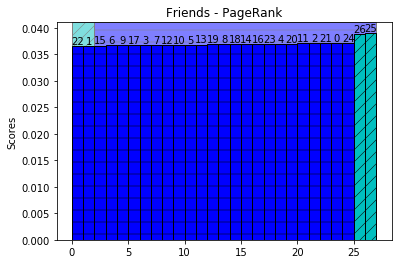

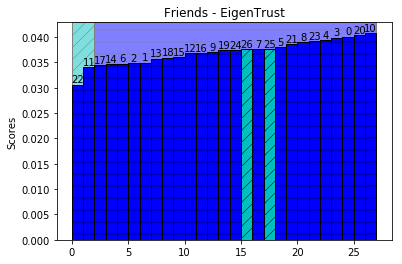

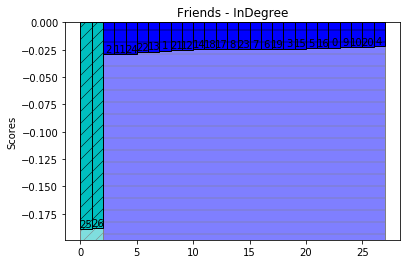

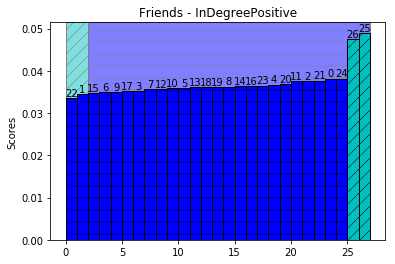

In [6]:
groups = ('f', 'unaffiliated')
colors = {'f': 'c', 'unaffiliated': 'b'}
results = community.simulate(ALL_CENTRALITY_SCORES, 100, 100)
for (name, result, intermediate_results) in results:
  c = chart(result, groups, colors, test_name + " - " + name)

print_metrics(name, result, groups)
print_stddev_metrics(name, intermediate_results, groups)